<a href="https://colab.research.google.com/github/juanbs2000/Tutorial-GEOAI/blob/main/Humedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving prueba2.tif to prueba2 (1).tif


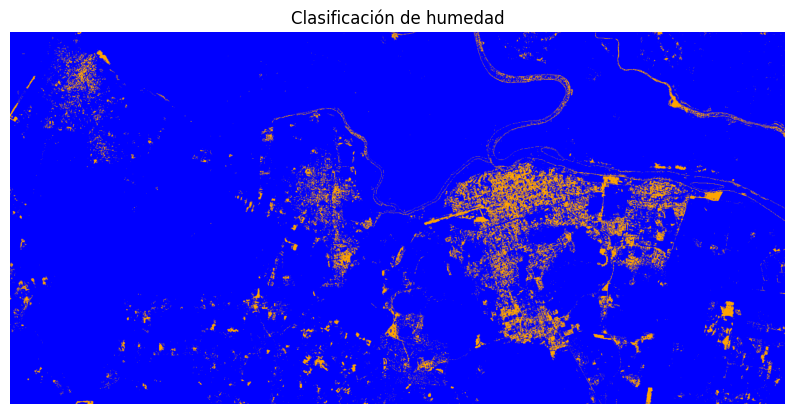

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Paso 1: Instalar rasterio si no está instalado
!pip install rasterio matplotlib --quiet

# Paso 2: Subir archivo .tif
from google.colab import files
uploaded = files.upload()  # selecciona tu archivo, por ejemplo prueba2.tif

# Paso 3: Leer imagen como una sola banda con rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Cargar imagen .tif
tif_name = list(uploaded.keys())[0]  # nombre del archivo subido
with rasterio.open(tif_name) as src:
    band = src.read(1)  # leer banda 1 (escala de grises)
    profile = src.profile  # guardar metadata para exportar luego

# Paso 4: Clasificación simple por umbral (oscuro = húmedo, claro = seco)
# Normalizar entre 0 y 1
band_norm = (band - np.min(band)) / (np.max(band) - np.min(band))

# Definir umbral: por ejemplo, < 0.5 es húmedo, >= 0.5 es seco
threshold = 0.5
classified = np.where(band_norm < threshold, 1, 2)  # 1: húmedo, 2: seco

# Paso 5: Visualizar con colores
cmap = ListedColormap(['blue', 'orange'])  # azul: húmedo, naranja: seco

plt.figure(figsize=(10, 8))
plt.imshow(classified, cmap=cmap)
plt.title('Clasificación de humedad')
plt.axis('off')
plt.show()

# Paso 6: Guardar como imagen PNG
from PIL import Image

# Convertir a imagen RGB para guardar como PNG
img_rgb = np.zeros((classified.shape[0], classified.shape[1], 3), dtype=np.uint8)
img_rgb[classified == 1] = [0, 0, 255]       # azul
img_rgb[classified == 2] = [255, 165, 0]     # naranja

# Guardar
Image.fromarray(img_rgb).save('clasificacion_humedad.png')
files.download('clasificacion_humedad.png')


Saving prueba2.tif to prueba2.tif


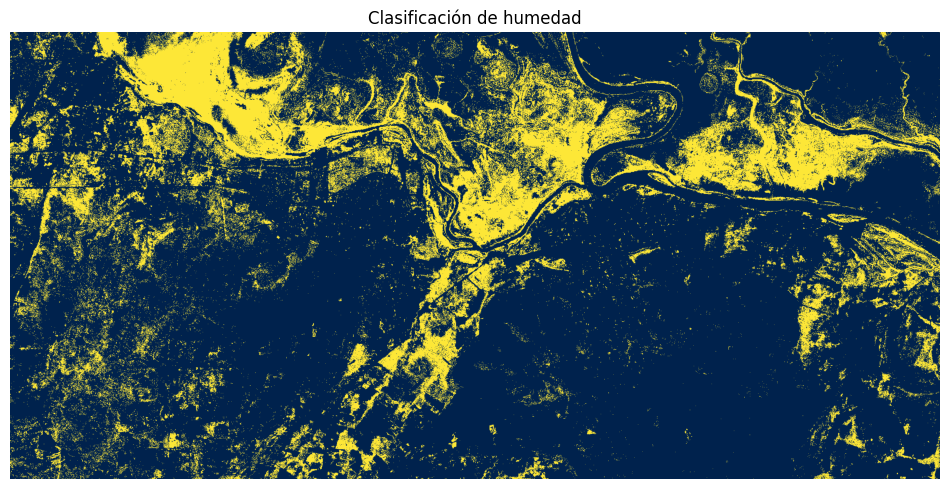

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Instalar OpenCV si es necesario
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Cargar la imagen ===
# Asegúrate de subir primero la imagen 'prueba2.tif'
from google.colab import files
uploaded = files.upload()

# Cargar imagen como escala de grises
img = cv2.imread("prueba2.tif", cv2.IMREAD_GRAYSCALE)

# === 2. Definir el percentil para la clasificación ===
percentil = 20  # Ajusta este valor: 5, 10, 15... cuanto más bajo, más selectivo (menos zonas azules)

# Eliminar valores 0 (áreas sin datos) para el cálculo del umbral
img_valid = img[img > 0]
threshold = np.percentile(img_valid, percentil)

# === 3. Clasificación: húmedo (< threshold) = 1, seco (>= threshold) = 0 ===
clasificacion = np.where(img < threshold, 1, 0)

# === 4. Visualizar resultado ===
plt.figure(figsize=(12, 8))
plt.imshow(clasificacion, cmap='cividis')
plt.title("Clasificación de humedad")
plt.axis('off')
plt.show()

# === 5. Guardar resultado como imagen ===
clasificacion_img = (clasificacion * 255).astype(np.uint8)  # Convertir a escala de grises
cv2.imwrite("clasificacion_humedad.tif", clasificacion_img)

# Descargar resultado
files.download("clasificacion_humedad.tif")


⬆️ Sube tus archivos B03.tiff, B08.tiff, B11.tiff ahora...


Saving B03.tiff to B03 (1).tiff
Saving B08.tiff to B08.tiff
Saving B11.tiff to B11 (1).tiff


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


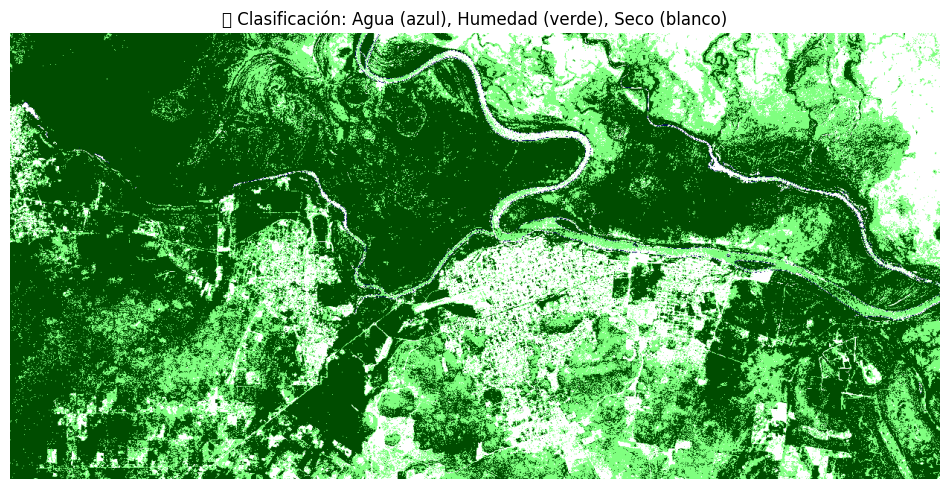

🔎 Resultados del análisis:
💧 Agua (NDWI > 0.3): 0.28%
🌿 Humedad alta (NDMI > 0.2): 55.33%
🍃 Humedad moderada (NDMI 0.05–0.2): 27.80%
☀️ Zonas secas: 16.59%


In [ ]:
# Paso 1: Instalar librerías necesarias (solo la primera vez)
!pip install rasterio matplotlib

# Paso 2: Subir los archivos TIFF manualmente
from google.colab import files
print("⬆️ Sube tus archivos B03.tiff, B08.tiff, B11.tiff ahora...")
uploaded = files.upload()

# Paso 3: Cargar imágenes TIFF como arrays numéricos
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("B03.tiff") as src:
    b03 = src.read(1).astype('float32')

with rasterio.open("B08.tiff") as src:
    b08 = src.read(1).astype('float32')

with rasterio.open("B11.tiff") as src:
    b11 = src.read(1).astype('float32')

# Paso 4: Calcular NDWI y NDMI
ndwi = (b03 - b08) / (b03 + b08 + 1e-6)   # Agua
ndmi = (b08 - b11) / (b08 + b11 + 1e-6)   # Humedad

# Paso 5: Clasificar píxeles
ndwi_mask = ndwi > 0.3                 # Agua (ríos, lagos)
ndmi_humedo = ndmi > 0.2               # Muy húmedo
ndmi_moderado = (ndmi > 0.05) & (ndmi <= 0.2)

# Paso 6: Crear imagen RGB combinada
rgb = np.ones((ndwi.shape[0], ndwi.shape[1], 3))  # fondo blanco

# Agua: azul oscuro
rgb[ndwi_mask] = [0.0, 0.0, 0.4]

# Humedad alta: verde oscuro
rgb[ndmi_humedo & ~ndwi_mask] = [0.0, 0.3, 0.0]

# Humedad moderada: verde claro
rgb[ndmi_moderado & ~ndwi_mask] = [0.5, 1.0, 0.5]

# Paso 7: Mostrar resultado
plt.figure(figsize=(12, 8))
plt.imshow(rgb)
plt.title("🌍 Clasificación: Agua (azul), Humedad (verde), Seco (blanco)")
plt.axis('off')
plt.show()

# Paso 8: Cálculo de porcentajes
total = ndwi.size
agua_pct = 100 * np.sum(ndwi_mask) / total
humedo_pct = 100 * np.sum(ndmi_humedo & ~ndwi_mask) / total
moderado_pct = 100 * np.sum(ndmi_moderado & ~ndwi_mask) / total
seco_pct = 100 - agua_pct - humedo_pct - moderado_pct

print("🔎 Resultados del análisis:")
print(f"💧 Agua (NDWI > 0.3): {agua_pct:.2f}%")
print(f"🌿 Humedad alta (NDMI > 0.2): {humedo_pct:.2f}%")
print(f"🍃 Humedad moderada (NDMI 0.05–0.2): {moderado_pct:.2f}%")
print(f"☀️ Zonas secas: {seco_pct:.2f}%")


⬆️ Sube tus archivos B03.tiff, B08.tiff, B11.tiff...


Saving B03.tiff to B03 (2).tiff
Saving B08.tiff to B08 (1).tiff
Saving B11.tiff to B11 (2).tiff


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


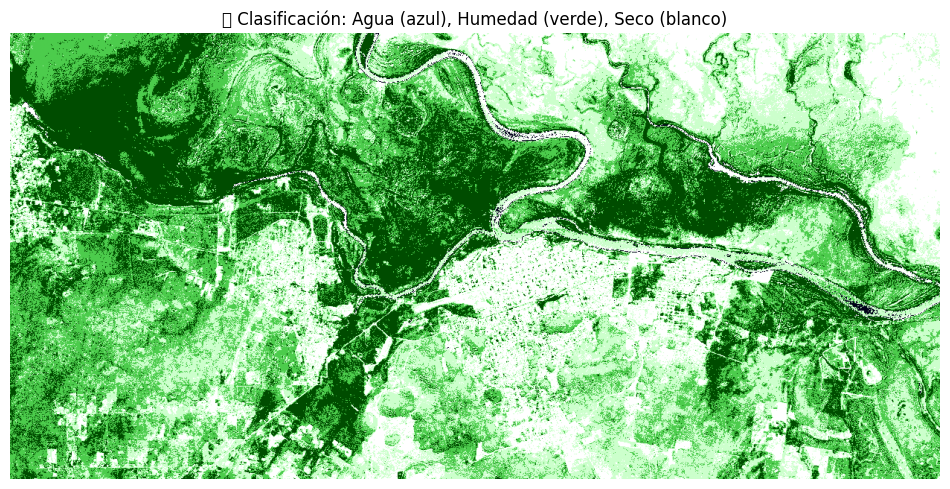

🔍 Resultados del análisis:
💧 Agua (NDWI > 0.2): 0.43%
🌿 Humedad muy alta (NDMI > 0.3): 24.80%
🌱 Humedad alta (NDMI 0.2–0.3): 30.53%
🍃 Humedad moderada (NDMI 0.05–0.2): 27.76%
☀️ Zonas secas: 16.48%


In [ ]:
# 1️⃣ Instalar librerías (solo la primera vez)
!pip install rasterio matplotlib

# 2️⃣ Subir archivos
from google.colab import files
print("⬆️ Sube tus archivos B03.tiff, B08.tiff, B11.tiff...")
uploaded = files.upload()

# Renombrado por si acaso
import os
if "BO8.tiff" in uploaded:
    os.rename("BO8.tiff", "B08.tiff")

# 3️⃣ Leer bandas con rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("B03.tiff") as src:
    b03 = src.read(1).astype('float32')
with rasterio.open("B08.tiff") as src:
    b08 = src.read(1).astype('float32')
with rasterio.open("B11.tiff") as src:
    b11 = src.read(1).astype('float32')

# 4️⃣ Calcular índices
ndwi = (b03 - b08) / (b03 + b08 + 1e-6)
ndmi = (b08 - b11) / (b08 + b11 + 1e-6)

# 5️⃣ Clasificación según nuevos rangos
agua = ndwi > 0.2
muy_humedo = (ndmi > 0.3) & ~agua
humedo = (ndmi > 0.2) & (ndmi <= 0.3) & ~agua
moderado = (ndmi > 0.05) & (ndmi <= 0.2) & ~agua

# 6️⃣ Crear imagen RGB personalizada
rgb = np.ones((ndwi.shape[0], ndwi.shape[1], 3))  # blanco

rgb[agua] = [0.0, 0.0, 0.1]                    # azul oscuro
rgb[muy_humedo] = [0.0, 0.3, 0.0]              # verde oscuro
rgb[humedo] = [0.3, 0.8, 0.3]                  # verde medio
rgb[moderado] = [0.8, 1.0, 0.8]                # verde claro

# 7️⃣ Mostrar la imagen
plt.figure(figsize=(12, 8))
plt.imshow(rgb)
plt.title("🌎 Clasificación: Agua (azul), Humedad (verde), Seco (blanco)")
plt.axis('off')
plt.show()

# 8️⃣ Porcentajes de cada categoría
total = ndwi.size
agua_pct = 100 * np.sum(agua) / total
muy_humedo_pct = 100 * np.sum(muy_humedo) / total
humedo_pct = 100 * np.sum(humedo) / total
moderado_pct = 100 * np.sum(moderado) / total
seco_pct = 100 - agua_pct - muy_humedo_pct - humedo_pct - moderado_pct

# 9️⃣ Resultados
print("🔍 Resultados del análisis:")
print(f"💧 Agua (NDWI > 0.2): {agua_pct:.2f}%")
print(f"🌿 Humedad muy alta (NDMI > 0.3): {muy_humedo_pct:.2f}%")
print(f"🌱 Humedad alta (NDMI 0.2–0.3): {humedo_pct:.2f}%")
print(f"🍃 Humedad moderada (NDMI 0.05–0.2): {moderado_pct:.2f}%")
print(f"☀️ Zonas secas: {seco_pct:.2f}%")


📊 Resultados del análisis:
🌊 Agua alta (NDWI > 0.2): 0.43%
💧 Agua media (0.1 < NDWI ≤ 0.2): 0.75%
💧 Agua baja (0 < NDWI ≤ 0.1): 0.76%
🌿 Humedad alta (NDMI > 0.2): 55.24%
🌿 Humedad media (0.1–0.2): 20.60%
🌿 Humedad baja (0–0.1): 11.77%
🌞 Zonas secas (NDMI < 0): 10.46%


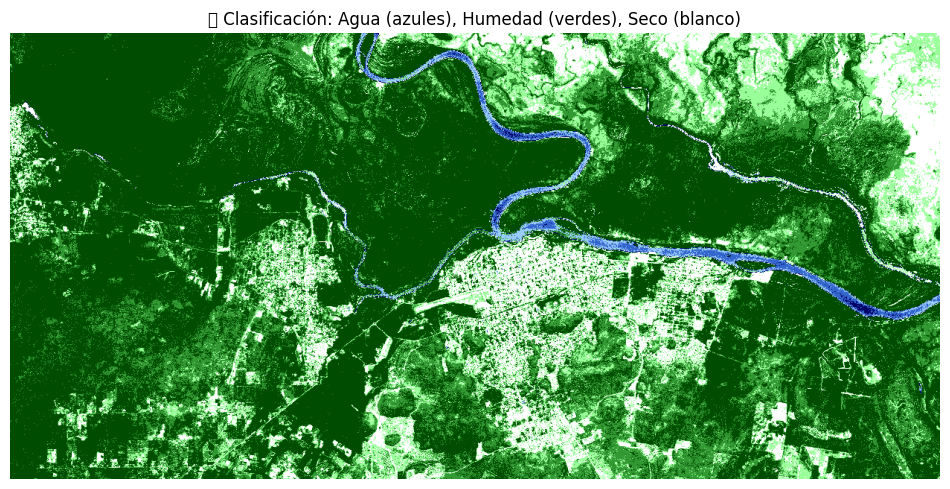

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

# Cargar bandas
with rasterio.open("B03.tiff") as b3_src:
    b3 = b3_src.read(1).astype("float32")
with rasterio.open("B08.tiff") as b8_src:
    b8 = b8_src.read(1).astype("float32")
with rasterio.open("B11.tiff") as b11_src:
    b11 = b11_src.read(1).astype("float32")

# Calcular NDWI y NDMI
ndwi = (b3 - b8) / (b3 + b8)
ndmi = (b8 - b11) / (b8 + b11)

# Inicializar imagen RGB en blanco
rgb = np.ones((*ndwi.shape, 3), dtype='float32')  # Blanco por defecto

# Máscara de agua con NDWI (prioridad)
agua_alta = ndwi > 0.2
agua_media = (ndwi > 0.1) & (ndwi <= 0.2)
agua_baja = (ndwi > 0) & (ndwi <= 0.1)

# Colorear zonas de agua
rgb[agua_alta] = [0.0, 0.0, 0.4]   # Azul oscuro
rgb[agua_media] = [0.2, 0.4, 0.8]  # Azul medio
rgb[agua_baja] = [0.6, 0.8, 1.0]   # Azul claro

# Máscara de píxeles no usados por NDWI
resto = ~(agua_alta | agua_media | agua_baja)

# Colorear zonas húmedas con NDMI solo si no están clasificadas por NDWI
rgb[(ndmi > 0.2) & resto] = [0.0, 0.3, 0.0]   # Verde oscuro
rgb[(ndmi > 0.1) & (ndmi <= 0.2) & resto] = [0.2, 0.6, 0.2]  # Verde medio
rgb[(ndmi >= 0) & (ndmi <= 0.1) & resto] = [0.6, 1.0, 0.6]   # Verde claro
rgb[(ndmi < 0) & resto] = [1.0, 1.0, 1.0]      # Blanco seco

# Calcular estadísticas de cobertura
total = ndwi.size
pct = lambda mask: np.count_nonzero(mask) / total * 100

print("📊 Resultados del análisis:")
print(f"🌊 Agua alta (NDWI > 0.2): {pct(agua_alta):.2f}%")
print(f"💧 Agua media (0.1 < NDWI ≤ 0.2): {pct(agua_media):.2f}%")
print(f"💧 Agua baja (0 < NDWI ≤ 0.1): {pct(agua_baja):.2f}%")
print(f"🌿 Humedad alta (NDMI > 0.2): {pct((ndmi > 0.2) & resto):.2f}%")
print(f"🌿 Humedad media (0.1–0.2): {pct((ndmi > 0.1) & (ndmi <= 0.2) & resto):.2f}%")
print(f"🌿 Humedad baja (0–0.1): {pct((ndmi >= 0) & (ndmi <= 0.1) & resto):.2f}%")
print(f"🌞 Zonas secas (NDMI < 0): {pct((ndmi < 0) & resto):.2f}%")

# Mostrar imagen final
plt.figure(figsize=(12, 8))
plt.imshow(rgb)
plt.title("🌎 Clasificación: Agua (azules), Humedad (verdes), Seco (blanco)")
plt.axis('off')
plt.show()


Saving B03.tiff to B03 (3).tiff
Saving B08.tiff to B08 (2).tiff
Saving B11.tiff to B11 (3).tiff


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


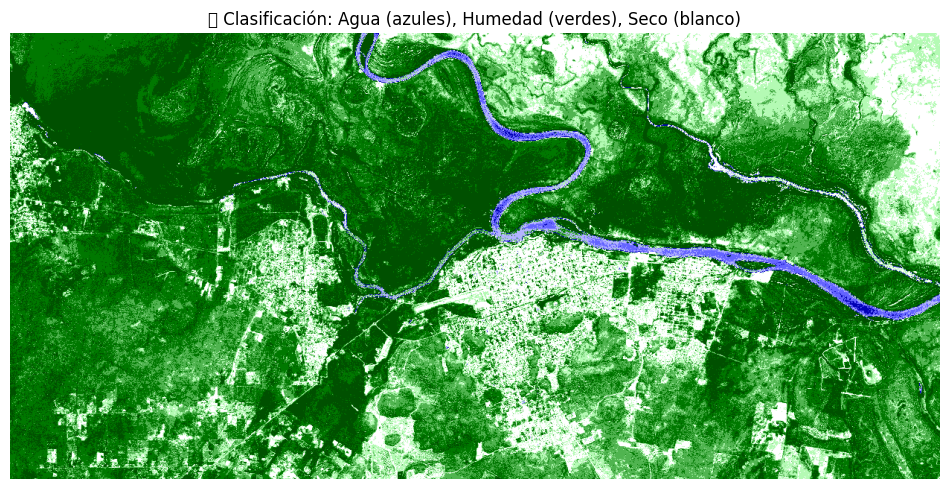

🔍 Resultados del análisis:
• Agua alta (NDWI > 0.2): 0.43%
• Agua media (0.1 < NDWI ≤ 0.2): 0.75%
• Agua baja (0 < NDWI ≤ 0.1): 0.76%
• Humedad muy alta (NDMI > 0.3): 24.80%
• Humedad alta (NDMI 0.2–0.3): 30.44%
• Humedad media (NDMI 0.1–0.2): 20.60%
• Humedad baja (NDMI 0–0.1): 11.74%
• Zonas secas (NDMI ≤ 0): 10.49%


In [ ]:
# Instalar dependencias si es necesario
!pip install rasterio matplotlib

import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import reshape_as_image

# Subida de archivos manual
from google.colab import files
uploaded = files.upload()

# Abrimos las bandas necesarias
with rasterio.open("B03.tiff") as src:
    b03 = src.read(1).astype('float32')
    profile = src.profile

with rasterio.open("B08.tiff") as src:
    b08 = src.read(1).astype('float32')

with rasterio.open("B11.tiff") as src:
    b11 = src.read(1).astype('float32')

# Normalización por si hay valores fuera de rango
np.seterr(divide='ignore', invalid='ignore')

# Cálculo de índices
ndwi = (b03 - b08) / (b03 + b08)
ndmi = (b08 - b11) / (b08 + b11)

# Clasificación de NDWI
agua_alta = ndwi > 0.2
agua_media = (ndwi > 0.1) & (ndwi <= 0.2)
agua_baja = (ndwi > 0) & (ndwi <= 0.1)

# NDMI solo se aplica donde no hay agua
ndmi_mask = ~(agua_alta | agua_media | agua_baja)

# Clasificación de NDMI (escala mejorada de verdes)
humedad_muy_alta = (ndmi > 0.3) & ndmi_mask
humedad_alta = (ndmi > 0.2) & (ndmi <= 0.3) & ndmi_mask
humedad_media = (ndmi > 0.1) & (ndmi <= 0.2) & ndmi_mask
humedad_baja = (ndmi > 0) & (ndmi <= 0.1) & ndmi_mask
zonas_secas = (ndmi <= 0) & ndmi_mask

# Creamos imagen RGB
img = np.zeros((ndwi.shape[0], ndwi.shape[1], 3), dtype=np.uint8)

# Agua (azules)
img[agua_alta] = [0, 0, 180]     # Azul oscuro
img[agua_media] = [100, 100, 255]  # Azul medio
img[agua_baja] = [180, 180, 255]   # Azul claro

# Humedad (verdes, escala mejorada)
img[humedad_muy_alta] = [0, 80, 0]      # Verde muy oscuro
img[humedad_alta] = [0, 120, 0]         # Verde oscuro
img[humedad_media] = [80, 180, 80]      # Verde medio
img[humedad_baja] = [180, 250, 180]     # Verde claro
img[zonas_secas] = [255, 255, 255]      # Blanco

# Mostrar imagen
plt.figure(figsize=(12, 7))
plt.imshow(img)
plt.title("🌊 Clasificación: Agua (azules), Humedad (verdes), Seco (blanco)")
plt.axis('off')
plt.show()

# Cálculo de porcentajes
total_pixels = ndwi.size
porcentajes = {
    "Agua alta (NDWI > 0.2)": np.sum(agua_alta) / total_pixels * 100,
    "Agua media (0.1 < NDWI ≤ 0.2)": np.sum(agua_media) / total_pixels * 100,
    "Agua baja (0 < NDWI ≤ 0.1)": np.sum(agua_baja) / total_pixels * 100,
    "Humedad muy alta (NDMI > 0.3)": np.sum(humedad_muy_alta) / total_pixels * 100,
    "Humedad alta (NDMI 0.2–0.3)": np.sum(humedad_alta) / total_pixels * 100,
    "Humedad media (NDMI 0.1–0.2)": np.sum(humedad_media) / total_pixels * 100,
    "Humedad baja (NDMI 0–0.1)": np.sum(humedad_baja) / total_pixels * 100,
    "Zonas secas (NDMI ≤ 0)": np.sum(zonas_secas) / total_pixels * 100,
}

# Mostrar resultados
print("🔍 Resultados del análisis:")
for key, val in porcentajes.items():
    print(f"• {key}: {val:.2f}%")
